### GOAL

Use unsupervised learning to create possible clusters to identify differences bewtween NBA veterans and non-veterans.


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/capstone_II/all_players - Sheet1.csv')
test= df

test

player_name  age  player_height  player_weight draft_year  gp  \
0              A.C. Green   33         205.74      102.05820       1985  83   
1              A.C. Green   34         205.74      102.05820       1985  82   
2              A.C. Green   35         205.74      102.05820       1985  50   
3              A.C. Green   36         205.74      102.05820       1985  82   
4              A.C. Green   37         205.74      102.05820       1985  82   
...                   ...  ...            ...            ...        ...  ..   
12839  Zydrunas Ilgauskas   34         220.98      117.93392       1996  65   
12840  Zydrunas Ilgauskas   35         220.98      117.93392       1996  64   
12841  Zydrunas Ilgauskas   36         220.98      117.93392       1996  72   
12842      Zylan Cheatham   24         195.58       99.79024  Undrafted   4   
12843      Zylan Cheatham   26         195.58       99.79024  Undrafted   1   

        pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0       7.2  7.9  0.8        -8.0     0.100     0.207    0.119   0.523   
1       7.3  8.1  1.5        -7.2     0.090     0.196    0.118   0.496   
2       4.9  4.6  0.5        -5.6     0.097     0.179    0.148   0.441   
3       5.0  5.9  1.0         8.1     0.089     0.179    0.111   0.482   
4       4.5  3.8  0.5         3.3     0.089     0.171    0.141   0.492   
...     ...  ...  ...         ...       ...       ...      ...     ...   
12839  12.9  7.5  1.0        14.8     0.109     0.212    0.237   0.523   
12840   7.4  5.4  0.8         7.9     0.107     0.197    0.189   0.491   
12841   5.0  4.0  0.4         9.4     0.119     0.178    0.159   0.531   
12842   3.0  2.3  0.8       -23.9     0.062     0.128    0.103   0.667   
12843   0.0  0.0  0.0      -106.8     0.000     0.000    0.250   0.000   

       ast_pct   season  
0        0.045  1996-97  
1        0.074  1997-98  
2        0.043  1998-99  
3        0.058  1999-00  
4        0.050  2000-01  
...        ...      ...  
12839    0.060  2008-09  
12840    0.058  2009-10  
12841    0.033  2010-11  
12842    0.094  2019-20  
12843    0.000  2021-22  

[12844 rows x 16 columns]

We need have the NBA players dataset. First, we want to change the **player name** column to a numeric vakue/indicator to make the computational work ahead easier for us.

In [ ]:
q=1
for i in range(0,len(df['player_name'])-1):
  if test.loc[i, 'player_name']==test.loc[i+1, 'player_name']:
    test.loc[i,'player_name']= q
  else:
    test.loc[i,'player_name']= q
    q+=1

test.loc[len(df['player_name'])-1,'player_name']= test.loc[len(df['player_name'])-2,'player_name']

test

player_name  age  player_height  player_weight draft_year  gp   pts  \
0               1   33         205.74      102.05820       1985  83   7.2   
1               1   34         205.74      102.05820       1985  82   7.3   
2               1   35         205.74      102.05820       1985  50   4.9   
3               1   36         205.74      102.05820       1985  82   5.0   
4               1   37         205.74      102.05820       1985  82   4.5   
...           ...  ...            ...            ...        ...  ..   ...   
12839        2550   34         220.98      117.93392       1996  65  12.9   
12840        2550   35         220.98      117.93392       1996  64   7.4   
12841        2550   36         220.98      117.93392       1996  72   5.0   
12842        2551   24         195.58       99.79024  Undrafted   4   3.0   
12843        2551   26         195.58       99.79024  Undrafted   1   0.0   

       reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0      7.9  0.8        -8.0     0.100     0.207    0.119   0.523    0.045   
1      8.1  1.5        -7.2     0.090     0.196    0.118   0.496    0.074   
2      4.6  0.5        -5.6     0.097     0.179    0.148   0.441    0.043   
3      5.9  1.0         8.1     0.089     0.179    0.111   0.482    0.058   
4      3.8  0.5         3.3     0.089     0.171    0.141   0.492    0.050   
...    ...  ...         ...       ...       ...      ...     ...      ...   
12839  7.5  1.0        14.8     0.109     0.212    0.237   0.523    0.060   
12840  5.4  0.8         7.9     0.107     0.197    0.189   0.491    0.058   
12841  4.0  0.4         9.4     0.119     0.178    0.159   0.531    0.033   
12842  2.3  0.8       -23.9     0.062     0.128    0.103   0.667    0.094   
12843  0.0  0.0      -106.8     0.000     0.000    0.250   0.000    0.000   

        season  
0      1996-97  
1      1997-98  
2      1998-99  
3      1999-00  
4      2000-01  
...        ...  
12839  2008-09  
12840  2009-10  
12841  2010-11  
12842  2019-20  
12843  2021-22  

[12844 rows x 16 columns]

Drop the columns we do not need for the model.  Then we will have all numeric features.


In [ ]:
df_learn= test.drop(columns=['season','draft_year'])
df_learn['player_name'] = pd.to_numeric(df_learn['player_name'])
df_learn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_name    12844 non-null  int64  
 1   age            12844 non-null  int64  
 2   player_height  12844 non-null  float64
 3   player_weight  12844 non-null  float64
 4   gp             12844 non-null  int64  
 5   pts            12844 non-null  float64
 6   reb            12844 non-null  float64
 7   ast            12844 non-null  float64
 8   net_rating     12844 non-null  float64
 9   oreb_pct       12844 non-null  float64
 10  dreb_pct       12844 non-null  float64
 11  usg_pct        12844 non-null  float64
 12  ts_pct         12844 non-null  float64
 13  ast_pct        12844 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 1.4 MB


In [ ]:
try_array=test.to_numpy()
len(try_array)

12844

Here we will identify how may years a particular player played in the NBA


In [ ]:
yrs_array = df_learn.groupby(['player_name']).age.count()
yrs_played = pd.DataFrame(yrs_array)
yrs_played.columns = ['yrs_played']
yrs_played

df_learn = pd.merge(df_learn, yrs_played, on='player_name')
df_learn.rename(columns={"age_x":"x","age_y":"yrs_played"})
df_learn

player_name  age  player_height  player_weight  gp   pts  reb  ast  \
0                1   33         205.74      102.05820  83   7.2  7.9  0.8   
1                1   34         205.74      102.05820  82   7.3  8.1  1.5   
2                1   35         205.74      102.05820  50   4.9  4.6  0.5   
3                1   36         205.74      102.05820  82   5.0  5.9  1.0   
4                1   37         205.74      102.05820  82   4.5  3.8  0.5   
...            ...  ...            ...            ...  ..   ...  ...  ...   
12839         2550   34         220.98      117.93392  65  12.9  7.5  1.0   
12840         2550   35         220.98      117.93392  64   7.4  5.4  0.8   
12841         2550   36         220.98      117.93392  72   5.0  4.0  0.4   
12842         2551   24         195.58       99.79024   4   3.0  2.3  0.8   
12843         2551   26         195.58       99.79024   1   0.0  0.0  0.0   

       net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  yrs_played  
0            -8.0     0.100     0.207    0.119   0.523    0.045           5  
1            -7.2     0.090     0.196    0.118   0.496    0.074           5  
2            -5.6     0.097     0.179    0.148   0.441    0.043           5  
3             8.1     0.089     0.179    0.111   0.482    0.058           5  
4             3.3     0.089     0.171    0.141   0.492    0.050           5  
...           ...       ...       ...      ...     ...      ...         ...  
12839        14.8     0.109     0.212    0.237   0.523    0.060          13  
12840         7.9     0.107     0.197    0.189   0.491    0.058          13  
12841         9.4     0.119     0.178    0.159   0.531    0.033          13  
12842       -23.9     0.062     0.128    0.103   0.667    0.094           2  
12843      -106.8     0.000     0.000    0.250   0.000    0.000           2  

[12844 rows x 15 columns]

Now we take the average career statistics for each player and this will be what our model looks at to make clusters.

In [ ]:
df_learn=df_learn.groupby(['player_name']).mean()
df_learn

age  player_height  player_weight         gp        pts  \
player_name                                                                  
1            35.000000     205.740000     102.058200  75.800000   5.780000   
2            23.000000     208.280000     102.965384   8.000000   1.000000   
3            24.000000     185.420000      81.646560  26.666667   3.800000   
4            22.000000     198.120000      81.192968  15.000000   3.700000   
5            23.000000     195.580000      86.182480  35.000000   4.400000   
...                ...            ...            ...        ...        ...   
2547         20.333333     198.966667     128.820128  38.000000  25.166667   
2548         26.000000     195.580000      90.718400  16.000000   1.800000   
2549         22.000000     200.660000      89.962413  49.333333   3.833333   
2550         29.846154     220.980000     117.933920  64.846154  12.938462   
2551         25.000000     195.580000      99.790240   2.500000   1.500000   

                  reb       ast  net_rating  oreb_pct  dreb_pct   usg_pct  \
player_name                                                                 
1            6.060000  0.860000   -1.880000  0.093000  0.186400  0.127400   
2            2.800000  0.000000  -32.600000  0.158000  0.208000  0.146000   
3            0.700000  1.566667   -6.700000  0.013333  0.040000  0.224000   
4            1.400000  0.100000  -20.100000  0.046000  0.152000  0.189000   
5            1.300000  0.600000   -4.900000  0.016000  0.105000  0.159000   
...               ...       ...         ...       ...       ...       ...   
2547         6.833333  3.466667    5.000000  0.077667  0.131000  0.288667   
2548         0.500000  0.300000  -15.300000  0.072000  0.045000  0.217000   
2549         1.333333  1.100000   -6.233333  0.036000  0.118333  0.211000   
2550         7.338462  1.092308    2.107692  0.124538  0.191000  0.229923   
2551         1.150000  0.400000  -65.350000  0.031000  0.064000  0.176500   

               ts_pct   ast_pct  yrs_played  
player_name                                  
1            0.486800  0.054000         5.0  
2            0.190000  0.000000         1.0  
3            0.324000  0.282000         3.0  
4            0.589000  0.032000         1.0  
5            0.607000  0.092000         1.0  
...               ...       ...         ...  
2547         0.639000  0.179333         3.0  
2548         0.435000  0.116000         1.0  
2549         0.492000  0.212667         3.0  
2550         0.531308  0.069385        13.0  
2551         0.333500  0.047000         2.0  

[2551 rows x 14 columns]

The average career length in the NBA is 4.8 years.  We will identify and NBA veteran as any player with a career 5 years or longer.


In [ ]:
vet_array = []
for i in range(0,len(df_learn['yrs_played'])):
  if df_learn['yrs_played'].iloc[i]<5:
    vet_array.append('0')
  else:
    vet_array.append('1')
vet_array


['1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1'

In [ ]:
df_learn['vet_stat'] = vet_array
df_learn

age  player_height  player_weight         gp        pts  \
player_name                                                                  
1            35.000000     205.740000     102.058200  75.800000   5.780000   
2            23.000000     208.280000     102.965384   8.000000   1.000000   
3            24.000000     185.420000      81.646560  26.666667   3.800000   
4            22.000000     198.120000      81.192968  15.000000   3.700000   
5            23.000000     195.580000      86.182480  35.000000   4.400000   
...                ...            ...            ...        ...        ...   
2547         20.333333     198.966667     128.820128  38.000000  25.166667   
2548         26.000000     195.580000      90.718400  16.000000   1.800000   
2549         22.000000     200.660000      89.962413  49.333333   3.833333   
2550         29.846154     220.980000     117.933920  64.846154  12.938462   
2551         25.000000     195.580000      99.790240   2.500000   1.500000   

                  reb       ast  net_rating  oreb_pct  dreb_pct   usg_pct  \
player_name                                                                 
1            6.060000  0.860000   -1.880000  0.093000  0.186400  0.127400   
2            2.800000  0.000000  -32.600000  0.158000  0.208000  0.146000   
3            0.700000  1.566667   -6.700000  0.013333  0.040000  0.224000   
4            1.400000  0.100000  -20.100000  0.046000  0.152000  0.189000   
5            1.300000  0.600000   -4.900000  0.016000  0.105000  0.159000   
...               ...       ...         ...       ...       ...       ...   
2547         6.833333  3.466667    5.000000  0.077667  0.131000  0.288667   
2548         0.500000  0.300000  -15.300000  0.072000  0.045000  0.217000   
2549         1.333333  1.100000   -6.233333  0.036000  0.118333  0.211000   
2550         7.338462  1.092308    2.107692  0.124538  0.191000  0.229923   
2551         1.150000  0.400000  -65.350000  0.031000  0.064000  0.176500   

               ts_pct   ast_pct  yrs_played vet_stat  
player_name                                           
1            0.486800  0.054000         5.0        1  
2            0.190000  0.000000         1.0        0  
3            0.324000  0.282000         3.0        0  
4            0.589000  0.032000         1.0        0  
5            0.607000  0.092000         1.0        0  
...               ...       ...         ...      ...  
2547         0.639000  0.179333         3.0        0  
2548         0.435000  0.116000         1.0        0  
2549         0.492000  0.212667         3.0        0  
2550         0.531308  0.069385        13.0        1  
2551         0.333500  0.047000         2.0        0  

[2551 rows x 15 columns]

In [ ]:
!pip install umap-learn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import datasets
import umap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00


First we standardize our data.


In [ ]:
X = df_learn
y= vet_array
scaler = StandardScaler()
X_std = scaler.fit_transform(X)



We first try the k means algorithim for clustering.

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

93.9 ms ± 18.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


We add PCA to our model to reduce the number of features to visualize the clusters.


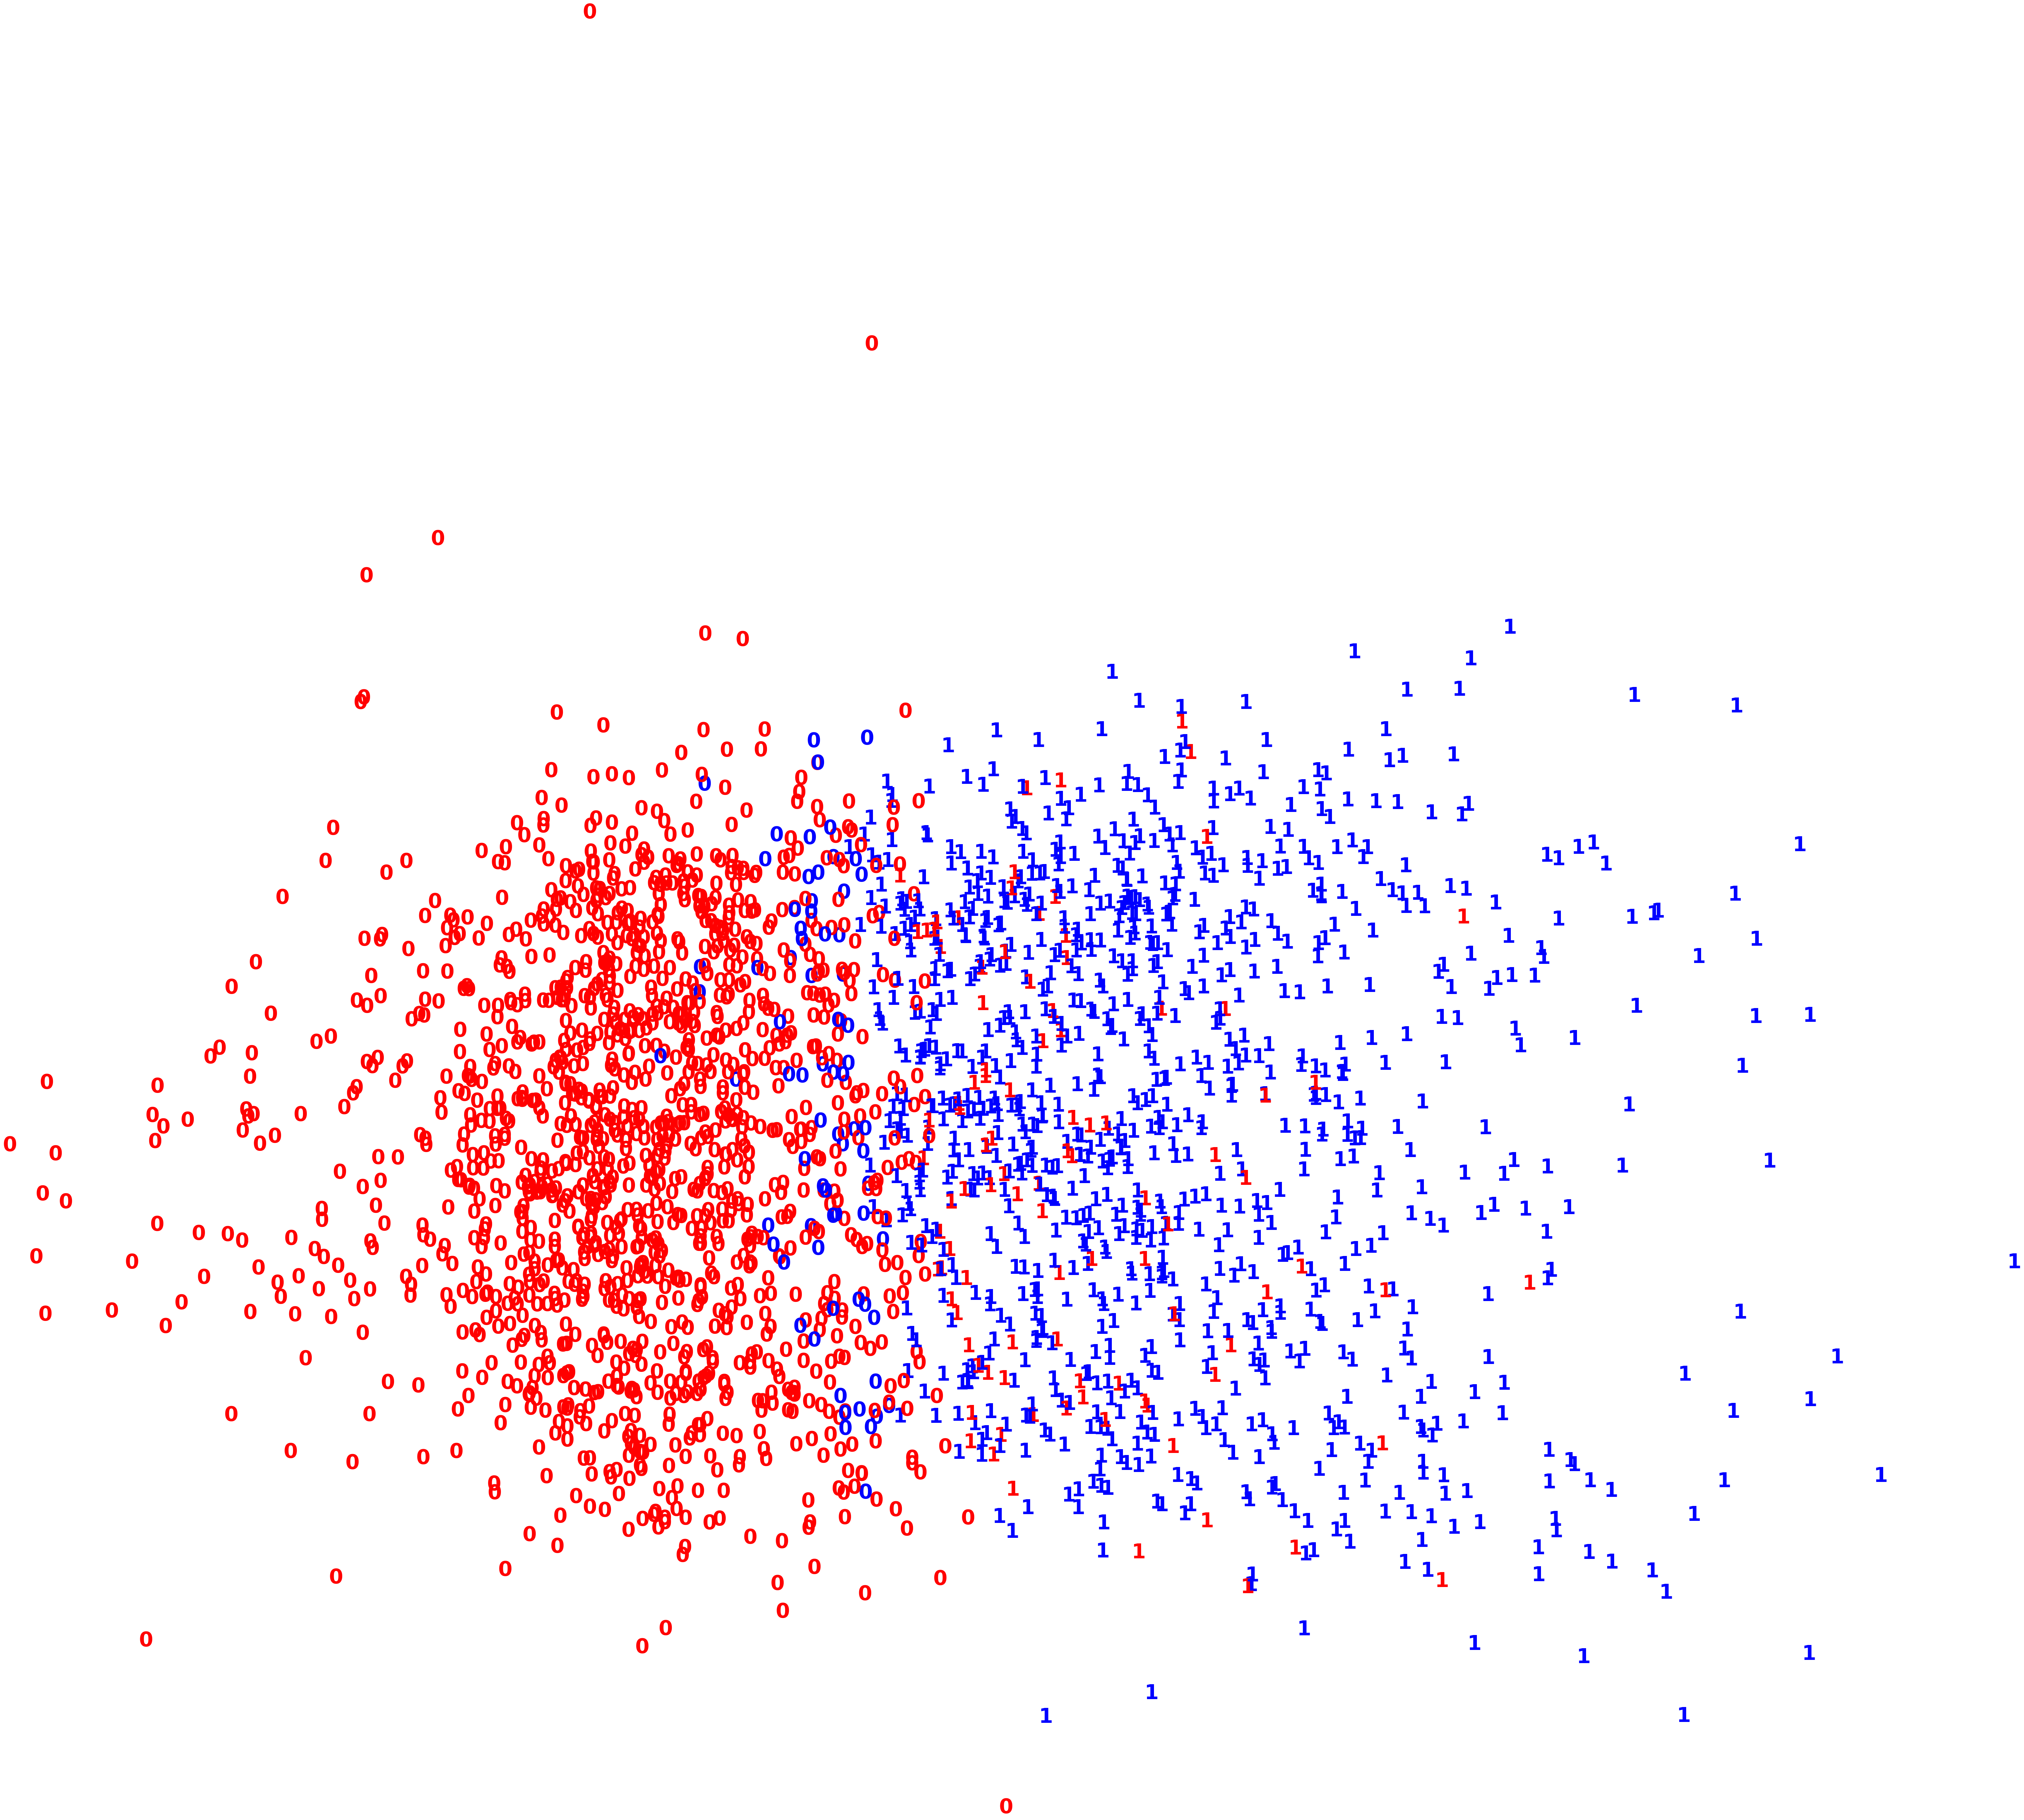

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

colours = ['red', 'blue']
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

PCA does an adequate job seperarting the two labels, hwoever there is a lot of noise in the middle of the visualization.  We can see that there is some a lot of over lap between the possible clusters.

Next we are going to try the DBSCAN algorithim.


In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5)


clusters = dbscan_cluster.fit_predict(X_std)

And for dimensionalty reduction we use UMAP.

In [ ]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

umap_results[0,0]

6.2739735

In [ ]:
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

DBSCAN shows more of a seperation between the clusters and veteran/non-veteran distinction.  The DBSCAN seems to work better for the dataset as the K-means algorithim uses centriods, which might seem counterintuitive because of the variance between different types of players and situations.  You can also identify outliers that are within the opposite cluster, which makes sense as there are players that do not fit the mold of the veteran and non verteran status.



We will test UMAP against t-sne for reducing features.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2551 samples in 0.012s...
[t-SNE] Computed neighbors for 2551 samples in 0.284s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2551
[t-SNE] Computed conditional probabilities for sample 2000 / 2551
[t-SNE] Computed conditional probabilities for sample 2551 / 2551
[t-SNE] Mean sigma: 5.353909
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.080803
[t-SNE] KL divergence after 300 iterations: 1.662814


In [ ]:
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP displays the seperation and clusters better than the T-SNE, as it displays the clusters through the noise better. The seperation between clusters is not as clear as when we used UMAP.   So our desired model consists of DBSCAN algorithim with UMAP for dimesionality reduction.


